# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Импорт библиотек

In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Загрузка данных

In [404]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [405]:
# с полощью метода info() изучим общую информацию о данных: количество строк и столбцов, типы данных и наличие пропуков
geo_data_0.info()

# выведем первые 5 строк на экран
geo_data_0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [406]:
# с полощью метода info() изучим общую информацию о данных: количество строк и столбцов, типы данных и наличие пропуков
geo_data_1.info()

# выведем первые 5 строк на экран
geo_data_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [407]:
# с полощью метода info() изучим общую информацию о данных: количество строк и столбцов, типы данных и наличие пропуков
geo_data_2.info()

# выведем первые 5 строк на экран
geo_data_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


**Каждый из файлов содержит следующие столбцы:**
- **признаки:**
       - id — уникальный идентификатор скважины;
       - f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- **целевой признак:**
       - product — объём запасов в скважине (тыс. баррелей).

**Посмотрим на гистограммы распределений данных**

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

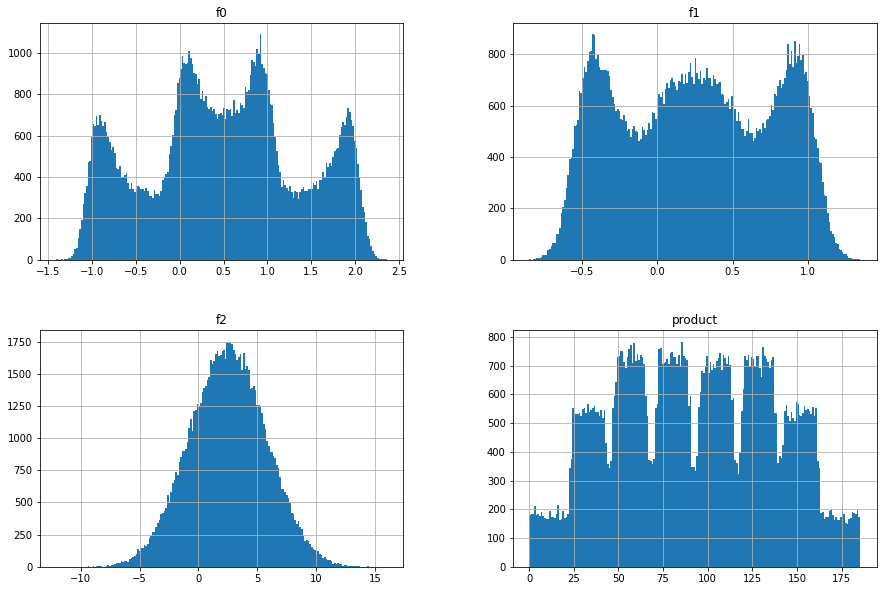

In [408]:
# построим гистограммы для столбцов geo_data_0
geo_data_0.hist(bins=200, figsize=(15, 10))

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

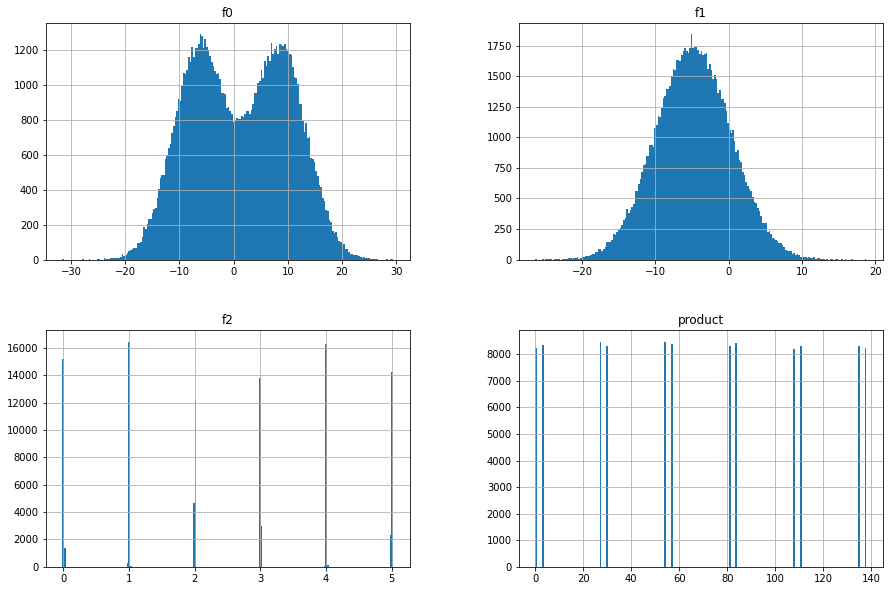

In [409]:
# построим гистограммы для столбцов geo_data_1
geo_data_1.hist(bins=200, figsize=(15, 10))

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

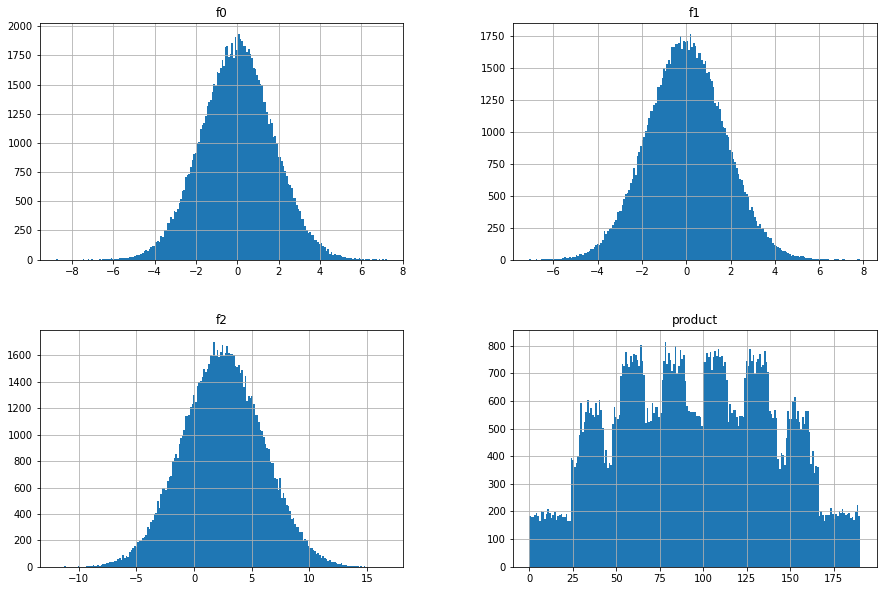

In [410]:
# построим гистограммы для столбцов geo_data_2
geo_data_2.hist(bins=200, figsize=(15, 10))

**Вывод по всем датафреймам:**
- содержат 100 000 объектов
- содержат 5 признаков:
           - 1 шт. качественный признак (id). Можно будет удалить, т.к. не влияет на целевой признак 
           - 4 шт. количественных признаков (f0, f1, f2).
- пропуски и дубликаты в датафреймах отсутствуют
- распределения некоторых признаков отличаются от нормального 
- присутствуют небольшие выбросы, но неизвестно, что означают признаки и из-за этого сложно говорить об адекватности распределения
- масштабы распределений признаков f0, f1, f2 не сильно отличаются друг от друга - нет необходимости применять масштабирование.
- оставим данные как есть.

**Удалим качественный признак (id)**

In [411]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

# проверим удаление
geo_data_0.info()
print()
geo_data_1.info()
print()
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f

**Данные проанализированы и подготовлены**

## Обучение и проверка модели

**Для каждого региона:**
- разбьем данные на обучающую и валидационную выборки в соотношении 75:25
- обучим модель линейной регрессии и сделайте предсказания на валидационной выборке
- сохраните предсказания и правильные ответы на валидационной выборке
- выведем средний запас предсказанного сырья и RMSE модели

Для этого создадим функцию, чтобы не писать один и тот же код для каждого региона, то есть 3 раза.

In [412]:
def region_prediction(region):
    '''
    - Функция делит данные на признаки и целевой признак
    - Функция разделяет исходные данные на обучающую и валидационную выборки в соотношении 75:25
    - Обучает модель линейной регрессии 
    - Делает предсказания на валидационной выборке
    - Выводит средний запас предсказанного сырья 
    - Выводит RMSE модели
    
    Входные данные: region - регион
    Выходные данные: - Размер тренировочной выборки
                     - Размер валидационой выборки)
                     - Cредний запас предсказанного сырья
                     - RMSE модели
    
    '''
    # Разделим данные на признаки и целевой признак
    target = region['product']
    features = region.drop('product', axis=1)
    
    #
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, 
                                                                                  random_state=12345)
    print('Размер тренировочной выборки:', features_train.shape)
    print('Размер валидационой выборки:', features_valid.shape)
    
    lr = LinearRegression().fit(features_train, target_train)
    predict = lr.predict(features_valid)

    print('Cредний запас предсказанного сырья: {:.3f} тыс. баррелей'.format(predict.mean()))
    print('RMSE модели: {:.2f}'.format(mean_squared_error(target_valid, predict)**.5))
    
    return predict, target_valid

**- Регион 0**

In [413]:
predict_0, target_valid_0 = region_prediction(geo_data_0)

Размер тренировочной выборки: (75000, 3)
Размер валидационой выборки: (25000, 3)
Cредний запас предсказанного сырья: 92.593 тыс. баррелей
RMSE модели: 37.58


**- Регион 1**

In [414]:
predict_1, target_valid_1 = region_prediction(geo_data_1)

Размер тренировочной выборки: (75000, 3)
Размер валидационой выборки: (25000, 3)
Cредний запас предсказанного сырья: 68.729 тыс. баррелей
RMSE модели: 0.89


**- Регион 2**

In [415]:
predict_2, target_valid_2 = region_prediction(geo_data_2)

Размер тренировочной выборки: (75000, 3)
Размер валидационой выборки: (25000, 3)
Cредний запас предсказанного сырья: 94.965 тыс. баррелей
RMSE модели: 40.03


**Для каждого региона:**
- данные были разделены на обучающую и валидационные выборки в соотношении 75:25
- модели логистической регрессии были обучены на обучающих выборках
- результаты обучения были проверены на валидационных выборках:
             - для региона 0 - среднее полученное значение равно 92.593 тыс. баррелей 
                             - RMSE равна 37.58
             - для региона 1 - среднее полученное значение равно 68.729 тыс. баррелей 
                             - RMSE равна 0.89
             - для региона 2 - среднее полученное значение равно 94.965 тыс. баррелей 
                             - RMSE, равной 40.03

**Вывод для каждого региона:**
- в регионе 1 прогноз получился очень точным, но среднее спрогнозированное значение меньше, чем в других регионах примерно на 25 тыс. баррелей;
- в регионах 0 и 2 средние значения значительно больше, чем в регионе 1, но и погрешность вычислений очень высока

## Подготовка к расчёту прибыли

- Сохраним в отдельных переменных все ключевые значения для расчётов 

In [416]:
# Бюджет на разработку скважин в регионе
BUDGET = 10**10

# Скважины для исследования
WELLS_TO_EXPLORE = 500

# Скважины для разработки
WELLS_TO_DO = 200

# Доход от 1000 баррелей
REVENUE_PER_UNIT = 4.5*10**5

- Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [417]:
min_product = BUDGET / (WELLS_TO_DO * REVENUE_PER_UNIT)
print('Минимальный объём продукта с одной скважины для безубыточной разработки: {:.2f} тыс. баррелей'.format(min_product))

Минимальный объём продукта с одной скважины для безубыточной разработки: 111.11 тыс. баррелей


- Сравним полученный объём сырья со средним запасом в каждом регионе

In [418]:
print('Соотношение безубыточного уровня разработки и среднего объема в регионе 0 - {:.2f}'
      .format(geo_data_0['product'].mean() / min_product))

Соотношение безубыточного уровня разработки и среднего объема в регионе 0 - 0.83


In [419]:
print('Соотношение безубыточного уровня разработки и среднего объема в регионе 1 - {:.2f}'
      .format(geo_data_1['product'].mean() / min_product))

Соотношение безубыточного уровня разработки и среднего объема в регионе 1 - 0.62


In [420]:
print('Соотношение безубыточного уровня разработки и среднего объема в регионе 2 - {:.2f}'
      .format(geo_data_2['product'].mean() / min_product))

Соотношение безубыточного уровня разработки и среднего объема в регионе 2 - 0.86


**Выводы:**
- Минимальный объём продукта с одной скважины для безубыточной разработки 111.11 тыс. баррелей. Данный показатель рассчитан при условии выбора 200 лучших скважин из 500 в выборке
- Полученный объём сырья для безубыточной разработки был сравнен со средним значением объема нефти в скважинах для каждого региона. Во всех регионах средний объем нефти в скважине меньше необходимого для безубыточной разработки и составляет от 0.62 до 0.86
- Сделаем вывод, что в любом из регионов необходимо искать богатые месторождения, которые превышают средние показатели для региона

## Расчёт прибыли и рисков 

### Расчёт прибыли

Напишим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- Выберим скважины с максимальными значениями предсказаний.
- Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитаем прибыль для полученного объёма сырья.

In [421]:
def predicted_income (target, predict, state, replace=False, show_res=True, return_res=False):
    '''
    - Функция берёт выборку размера WELLS_TO_EXPLORE, выбирает WELLS_TO_DO наилучших значений
    - Функция считает среднее значение объёма сырья для выбранных скважин
    - Функция считает суммарный целевой объём сырья
    - Функция считает прибыль для полученного объёма сырья
    
    Функция выводит:  прибыль для полученного объёма сырья
    ''' 
    target = pd.Series(target).reset_index(drop=True)
    predict = pd.Series(*predict.reshape(1,-1))
   
    ### возьмем рандомно 500 скважин
    sample_predict = predict.sample(n=WELLS_TO_EXPLORE, replace=replace, random_state=state)
    
    ### выборим из них лучших 200
    predict_sorted = sample_predict.sort_values(ascending=False).head(WELLS_TO_DO)
    
    ### отбор реалных значений таргетов
    top_targets = target[predict_sorted.index]
    top_wells_mean = top_targets.mean()
    volume = top_targets.sum()
    income = volume * REVENUE_PER_UNIT - BUDGET
    
    if show_res:
        print('Средний запас сырья среди скважин с максимальным показателем: {:.2f} млн. рублей'.format(top_wells_mean))
        print('Суммарный целевой объём сырья: {:.2f}'.format(volume))
        print('Прибыль для полученного объёма сырья: {:.2f}'.format(income))
    if return_res:
        return income

**- Регион 0**

In [422]:
predicted_income(target_valid_0, predict_0, state=12345)

Средний запас сырья среди скважин с максимальным показателем: 118.66 млн. рублей
Суммарный целевой объём сырья: 23731.26
Прибыль для полученного объёма сырья: 679068857.89


**- Регион 1**

In [423]:
predicted_income(target_valid_1, predict_1, state=12345)

Средний запас сырья среди скважин с максимальным показателем: 119.77 млн. рублей
Суммарный целевой объём сырья: 23954.40
Прибыль для полученного объёма сырья: 779479884.18


**- Регион 2**

In [424]:
predicted_income(target_valid_2, predict_2, state=12345)

Средний запас сырья среди скважин с максимальным показателем: 116.00 млн. рублей
Суммарный целевой объём сырья: 23199.98
Прибыль для полученного объёма сырья: 439990143.02


### Расчёт прибыли и рисков

Посчитайте риски и прибыль для каждого региона:
- Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [425]:
def profit_bootstrap(target, predict):
    '''
    Функция для расчета прибыли и рисков с применением техники Bootstrap
    Функция берёт выборку размера WELLS_TO_EXPLORE, выбирает WELLS_TO_DO наивысших значений,
    считает общую прибыль и сохраняет её в списке incomes.
    
    Функция выводит:  оценку средней прибыли
                      95% доверительный интервал (считается с помощью функции quantile) риск убытков 
    '''
    bootstrap_samples = 1000
    alpha = 0.05
    incomes = []
    state = np.random.RandomState(42)
    
    for i in range(bootstrap_samples):
        income = predicted_income(target, predict, state, replace=True, show_res=False, return_res=True)
        incomes.append(income)

    incomes = pd.Series(incomes)
    income_mean = incomes.mean()
    conf_int_left = incomes.quantile(alpha/2)
    conf_int_right = incomes.quantile(1 - alpha/2)
    
    loss_count = 0
    for inc in incomes :
        if inc < 0 :
            loss_count += 1
    loss_rate = loss_count / bootstrap_samples
       
        
    print('Средняя прибыль {:.2f} (млн. рублей)'.format(income_mean / 10**6))
    print('95% доверительный интервал: {:.2f} : {:.2f} (млн. рублей)'.format(conf_int_left / 10**6, conf_int_right / 10**6))
    print('Риск убытков: {:.2f} %'.format(loss_rate * 100))
    
    if loss_rate * 100 < 2.5:
        print('В этом регионе вероятность убытков меньше 2.5%, следовательно регион нам подхолит')
    else:
        print('В этом регионе вероятность убытков больше 2.5%, следовательно регион нам НЕ подхолит')

**Регион 0**

In [426]:
profit_bootstrap(target_valid_0, predict_0)

Средняя прибыль 381.63 (млн. рублей)
95% доверительный интервал: -97.45 : 878.51 (млн. рублей)
Риск убытков: 7.30 %
В этом регионе вероятность убытков больше 2.5%, следовательно регион нам НЕ подхолит


**Регион 1**

In [427]:
profit_bootstrap(target_valid_1, predict_1)

Средняя прибыль 451.79 (млн. рублей)
95% доверительный интервал: 67.48 : 849.38 (млн. рублей)
Риск убытков: 0.70 %
В этом регионе вероятность убытков меньше 2.5%, следовательно регион нам подхолит


**Регион 2**

In [428]:
profit_bootstrap(target_valid_2, predict_2)

Средняя прибыль 390.31 (млн. рублей)
95% доверительный интервал: -128.80 : 917.83 (млн. рублей)
Риск убытков: 7.70 %
В этом регионе вероятность убытков больше 2.5%, следовательно регион нам НЕ подхолит


**Выводы:**
- При расчёте показателей для 200 наилучших скважин из 500 в выборке:
    - Средний запас сырья с одной скважины среди всех регионов (118.66, 119.77, 116.00 соответственно) превосходит минимально необходимый объём 111.11.
- В результате применения техники Boostrap было выявлено, что единственный подходящий по условиям (вероятность убытков менее 2.5%) регион — это регион 1:
    - вероятность убытков составила 0.7%;
    - средняя выручка - 451.79 млн. рублей;
    - 95% доверительный интервал (67.48 - 849.38 млн. руб.) является самым узким среди всех регионов и не содержит в себе отрицательных значений (в отличие от других регионов).